##### PAIR PROGRAMMING MODULO 3 - SPRINT 1


- OBJETIVOS:

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer

1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?
2. ¿Qué es la asimetría?
3. ¿Es vuestra variable respuesta asimétrica?
4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?
5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [6]:
from scipy import stats
from scipy.stats import kurtosistest
from scipy.stats import skew
import statsmodels.api as sm
import ast
import warnings
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10, 8)

# Configuración warnings
# ======================
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista

# importamos la librería statsmodels para hacer el gráfico de cuantiles teóricos (Q-Q plot)

# importamos esta librería para calcular el sesgo (Skew)

# importamos esta libreria para calcular la curtosis

# importamos stats para test de shapiro


In [7]:
df = pd.read_csv('datos/pokePd1.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Grass,318,45,49,49,65,65,45
1,Poison,318,45,49,49,65,65,45
2,Grass,405,60,62,63,80,80,60
3,Poison,405,60,62,63,80,80,60
4,Grass,525,80,82,83,100,100,80


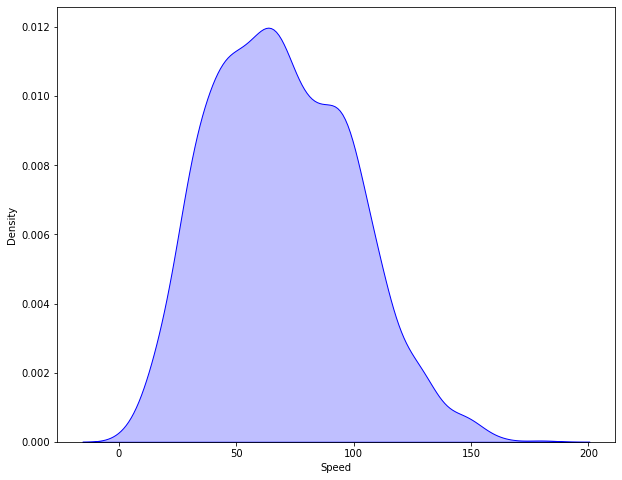

In [8]:
#Comprobamos que nuestra variable respuesta es asimétrica

sns.distplot(
    df['Speed'], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [9]:
df_numericas = df.select_dtypes(include= np.number)
df_numericas

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,318,45,49,49,65,65,45
2,405,60,62,63,80,80,60
3,405,60,62,63,80,80,60
4,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1575,550,100,130,100,63,60,97
1576,550,100,130,100,63,60,97
1577,550,100,130,100,63,60,97
1578,600,105,120,105,70,95,105


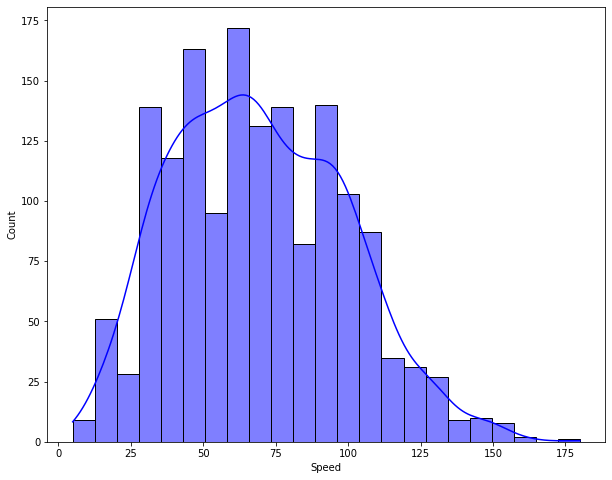

In [10]:
#Con el histograma representamos los datos observados de la variable respuesta "Velocidad" y una curva de ajuste, que es el parámetro kde

sns.histplot(df_numericas['Speed'], kde = True, color = 'blue');

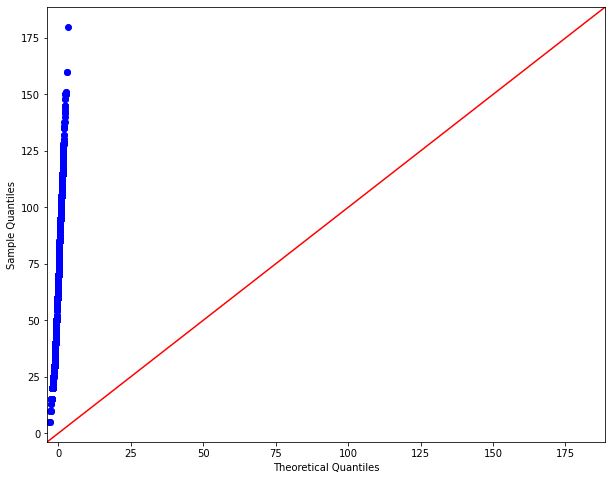

In [11]:
#Vemos que los datos no se acercan mucho a una campana de Gauss, así que vamos obtener el Q-Q plot:
sm.qqplot(df_numericas['Speed'], line = '45');

In [12]:
# Cuando los puntos azules están muy ajustados a la línea roja indican que la distribución es normal.
# vemos que en nuestro caso esto no se cumple.

In [13]:
# Intentamos medir la simetría de nuestra variable respuesta.
# Vemos que se trata de una distribución asimetrica positiva y que, por lo tanto,
# nuestros datos NO son normales.

df_numericas['Speed'].skew()


0.3223239433433113

In [14]:
# nos da un valor de cero por lo que nuestra curtosis podría parecerse a una curtosis mesocurtica
kurtosistest(df_numericas['Speed'])


KurtosistestResult(statistic=-3.7961615242271596, pvalue=0.0001469537702137451)

In [15]:
# Test de Shapiro-Wilk, el pvalue es menor de 0,05, por tanto los datos no son normales, rechazamos la H0

stats.shapiro(df_numericas['Speed'])

ShapiroResult(statistic=0.9851946830749512, pvalue=1.1599554650132404e-11)